In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
print(os.getcwd())
os.chdir('/content/drive/My Drive/1006')
print(os.getcwd())

/content
/content/drive/My Drive/1006


In [3]:
import pandas as pd
import numpy as np

In [4]:
!pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=1e53250825d701e10e29a26ac82029a5c609212e950346a74914c569126732b6
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


importing Jupyter notebook from SelectIndices.ipynb
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/1006
/content/drive/My Drive/1006
  Created wheel for fast-pytorch-kmeans: filename=fast_pytorch_kmeans-0.1.6-cp37-none-any.whl size=7090 sha256=195ea8982ce119c0081fccc6c0a40fbc2be79138d71843f4be0573eb1ebc1f09
  Stored in directory: /root/.cache/pip/wheels/bc/fc/2f/c4a16a2578591451fa497f455a1ec95431303421656c76c699
Successfully built fast-pytorch-kmeans
(80, 80)
[16 22 38 20 31 50 17 44 73 10 65 35 64]


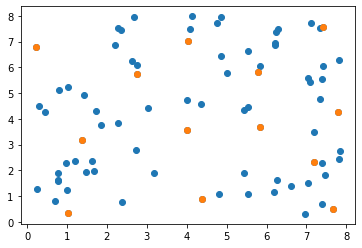

In [5]:
import import_ipynb
import SelectIndices as si

In [6]:
dataset_names = ['eo']
embed_types = ['cvec_pca16', 'cvec_nmf16', 'cvec_umap16', 'cvec_tsne16', 'bert', 'roberta', 'distil', 'glove6B', 'universal']
counts = [100, 200, 300, 400, 700, 1000, 1400, 1800, 2400, 3000, 3600, 4200]

## Random pick

In [7]:
max_obs_eo = len(pd.read_csv('eo_clean_train.csv', index_col=0))
#max_obs_news = len(pd.read_csv('news_clean_train.csv', index_col=0))
#max_obs_twitter = pd.read_csv('twitter_clean_train.csv', index_col=0)

indices_list = []
for c in counts:
  indices_list.append(si.random_indices(max_obs_eo, c))
with open('indices_eo_random.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % idl for idl in indices_list)

"""indices_list = []
for c in counts:
  indices_list.append(si.random_indices(max_obs_news, c))
with open('indices_news_random.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % idl for idl in indices_list)"""

'indices_list = []\nfor c in counts:\n  indices_list.append(si.random_indices(max_obs_news, c))\nwith open(\'indices_news_random.txt\', \'w\') as filehandle:\n    filehandle.writelines("%s\n" % idl for idl in indices_list)'

## K-means Clustering

In [8]:
for i in range(len(dataset_names)):
  for j in range(len(embed_types)):
    indices_list = []
    data = pd.read_csv(dataset_names[i] + '_' + embed_types[j] + '_train.csv', index_col=0)
    data = data.to_numpy()
    data = si.torch.from_numpy(data).float()
    for c in counts:
      indices_list.append(si.kmeans_indices(data, c))
    with open('indices_'+dataset_names[i]+'_'+embed_types[j]+'_kmeans.txt', 'w') as filehandle:
      filehandle.writelines("%s\n" % idl for idl in indices_list)
    print('Completed.')

used 96 iterations (1.1986s) to cluster 8437 items into 100 clusters
used 49 iterations (0.818s) to cluster 8437 items into 200 clusters
used 45 iterations (1.0461s) to cluster 8437 items into 300 clusters
used 31 iterations (0.9198s) to cluster 8437 items into 400 clusters
used 17 iterations (0.8594s) to cluster 8437 items into 700 clusters
used 15 iterations (1.0524s) to cluster 8437 items into 1000 clusters
used 13 iterations (1.2168s) to cluster 8437 items into 1400 clusters
used 9 iterations (1.0819s) to cluster 8437 items into 1800 clusters
used 10 iterations (1.5772s) to cluster 8437 items into 2400 clusters
used 8 iterations (1.5586s) to cluster 8437 items into 3000 clusters
used 7 iterations (1.6969s) to cluster 8437 items into 3600 clusters
used 6 iterations (1.6537s) to cluster 8437 items into 4200 clusters
Completed.
used 59 iterations (0.5647s) to cluster 8437 items into 100 clusters
used 61 iterations (1.0132s) to cluster 8437 items into 200 clusters
used 35 iterations (0

## Greedy farthest points based on KL Divergence

In [9]:
for i in range(len(dataset_names)):
  for j in range(len(embed_types)):
    kld_matrix = np.load(dataset_names[i] + '_kld_' + embed_types[j] + '.npy')
    indices_list = list(si.farthestPointSampler(kld_matrix, 4200))
    with open('indices_'+dataset_names[i]+'_'+embed_types[j]+'_kld.txt', 'w') as filehandle:
      filehandle.writelines("%s" % indices_list)
    print('Completed.')

Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.


## Greedy Farthest points based on Kolmogorov-Smirnov measure

In [10]:
for i in range(len(dataset_names)):
  for j in range(len(embed_types)):
    ks_matrix = np.load(dataset_names[i] + '_ks_' + embed_types[j] + '.npy')
    indices_list = list(si.farthestPointSampler(ks_matrix, 4200))
    with open('indices_'+dataset_names[i]+'_'+embed_types[j]+'_ks.txt', 'w') as filehandle:
      filehandle.writelines("%s" % indices_list)
    print('Completed.')

Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.


## Greedy Farthest points based on Cosine Distance

In [7]:
for i in range(len(dataset_names)):
  for j in range(len(embed_types)):
    cos_matrix = np.load(dataset_names[i] + '_cos_' + embed_types[j] + '.npy')
    indices_list = list(si.farthestPointSampler(cos_matrix, 4200))
    with open('indices_'+dataset_names[i]+'_'+embed_types[j]+'_cos.txt', 'w') as filehandle:
      filehandle.writelines("%s" % indices_list)
    print('Completed.')

Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
